# K-means clustering
This is an unsupervised learning which assigns the discrete labels to the group of data ( there can be more notes in the Udemy notebook )

Uses the technique `Expectation - Maximization`

In [1]:
import numpy as np
import seaborn as sns
sns.set();
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = False

In [2]:
from sklearn.metrics import pairwise_distances_argmin

`pairwise_distances_argmin`

> Compute minimum distances between one point and a set of points. Default = 'eucledian'

In [4]:
np.random.permutation(100)

array([ 9, 53, 98, 88, 30, 43, 71, 74, 85, 87, 84, 70, 10, 18, 96,  3, 64,
       26, 82, 59, 41, 13, 77, 17, 80, 11, 35,  2, 31, 54, 61, 23,  1, 45,
       69, 28, 55, 99, 60, 24, 78, 56, 16, 76, 90, 63, 44, 39, 73, 79,  7,
       38, 27,  8, 93, 14, 29, 86, 62, 40, 12, 66, 25, 42, 65,  6, 15, 20,
       48,  0, 89, 68, 33, 47, 36, 32, 97, 22, 37, 58, 94, 19, 50, 21, 92,
        4, 95, 46, 72, 34, 83, 52, 51,  5, 81, 67, 75, 49, 57, 91])

## 

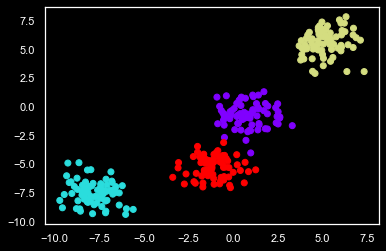

In [6]:
X, y = make_blobs(n_samples= 300, n_features= 2, cluster_std= 1, centers= 4) 
plt.scatter(X[:, 0], X[: ,1], c= y, cmap= 'rainbow')

In [41]:
i = np.random.permutation(X.shape[0])[:4]
centers = X[i]
centers

array([[-6.58297197, -6.98370057],
       [ 5.61444724,  5.42593154],
       [-8.24907727, -7.33419445],
       [ 1.32053138, -0.81816345]])

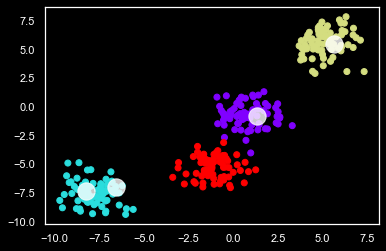

In [42]:
plt.scatter(X[:, 0], X[: ,1], c= y, cmap= 'rainbow')
plt.scatter(centers[:, 0], centers[: ,1], color= "white", s= 300, alpha= 0.8)

Look for the small explanation in the Book.

In [43]:
pairwise_distances_argmin(X, centers)

array([0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 2, 1, 1, 3, 3,
       1, 3, 3, 3, 3, 2, 0, 3, 3, 1, 1, 0, 1, 3, 3, 1, 2, 1, 3, 3, 3, 2,
       3, 2, 3, 0, 2, 2, 3, 3, 1, 3, 0, 0, 0, 3, 1, 2, 3, 3, 3, 1, 2, 0,
       0, 0, 1, 3, 0, 2, 2, 3, 3, 0, 2, 1, 2, 3, 1, 0, 3, 0, 1, 3, 2, 3,
       1, 3, 3, 1, 1, 1, 3, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 0, 2, 1,
       1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 2, 1, 0, 3, 3, 1, 1, 0, 2, 3, 2, 0,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 2, 0, 1, 3, 1, 0,
       1, 1, 2, 3, 2, 1, 0, 3, 0, 3, 1, 1, 3, 3, 3, 3, 1, 3, 0, 2, 3, 3,
       0, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 0, 3, 3, 3, 0, 3, 0, 1, 0, 2, 2,
       1, 2, 0, 0, 0, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 0, 3, 1, 0, 1,
       2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 2, 1, 1, 3, 3, 3, 3, 1, 0, 3, 1, 3,
       2, 2, 2, 0, 0, 3, 1, 3, 2, 1, 0, 1, 3, 1, 1, 3, 3, 3, 2, 0, 3, 3,
       3, 3, 0, 0, 1, 2, 0, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 2, 3, 2, 1, 3,
       2, 3, 3, 3, 0, 1, 3, 2, 3, 3, 0, 3, 2, 3], d

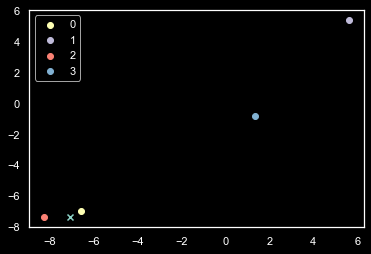

In [44]:
plt.scatter(X[1][0], X[1][1], marker= 'x')
plt.scatter(centers[0][0], centers[0][1], label= '0')
plt.scatter(centers[1][0], centers[1][1], label= '1')
plt.scatter(centers[2][0], centers[2][1], label= '2')
plt.scatter(centers[3][0], centers[3][1], label= '3')

plt.legend();

# 

In [45]:
labels= pairwise_distances_argmin(X, centers)

In [50]:
i

array([193, 284, 242,  20])

In [71]:
XX = [X[labels == i] for i in range(4)]

In [73]:
len(XX)

4

# I guess the pieces are ready... 
Let's make a function

In [85]:
def K_means(X, k):
    
    # Random centers
    centers = X[np.random.permutation(X.shape[0])][:k]
    
    # Getting new centers
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(axis= 0) for i in range(k)])
        
        if np.all(new_centers == centers):
            break
        centers = new_centers
    return centers, labels

In [88]:
locations, loc_labels = K_means(X, 4)

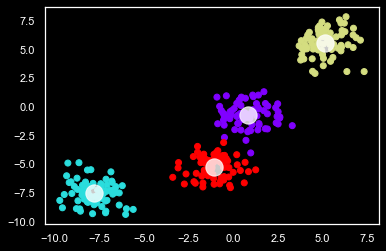

In [93]:
plt.scatter(X[:, 0], X[: ,1], c= y, cmap= 'rainbow')
plt.scatter(locations[:, 0], locations[: ,1], color= "white", s= 300, alpha= 0.8)

# Cool! Isn't? 

In [126]:
from sklearn.datasets import make_moons

In [136]:
X, y = make_moons(200, noise= .05)

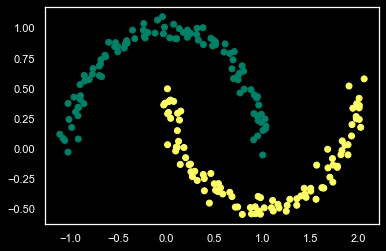

In [137]:
plt.scatter(X[:,0], X[:,1], c=y, cmap= 'summer')

In [138]:
loc, lab = K_means(X, 2)

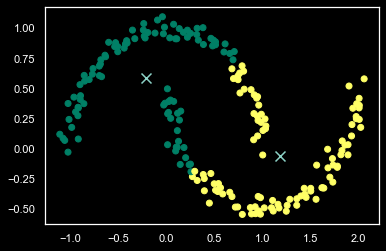

In [144]:
plt.scatter(X[:,0], X[:,1], c=lab, cmap= 'summer')
plt.scatter(loc[:,0], loc[:,1], s=100, marker= 'x')

## 

In [145]:
from sklearn.cluster import SpectralClustering

In [156]:
model = SpectralClustering(n_clusters= 2)

In [157]:
labels= model.fit_predict(X)
labels

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0])

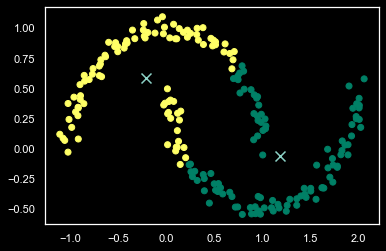

In [158]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap= 'summer')
plt.scatter(loc[:,0], loc[:,1], s=100, marker= 'x')

## Hah? 

# Nah! Need to give more settings...


In [159]:
model = SpectralClustering(n_clusters= 2, affinity= 'nearest_neighbors', assign_labels= 'kmeans')

In [160]:
labels= model.fit_predict(X)
labels

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1])

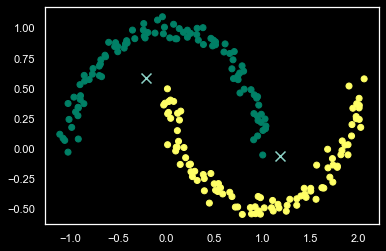

In [161]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap= 'summer')
plt.scatter(loc[:,0], loc[:,1], s=100, marker= 'x')

# DONE! 